# Code Implementation for Quantitative Methods Written Investigation

## The Impacts of Economic Development and Green Spaces on PM_10 Concentration in Worldwide Cities



## 1. Setting up 

In [59]:
#load packages 
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as sps

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline


#load packages
%matplotlib inline
from __future__ import print_function

try:
    xrange
except NameError:
    
    xrange = range

import matplotlib

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler


import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt


import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

import scipy.stats as stats

import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



from sklearn import metrics
from matplotlib.pyplot import MultipleLocator
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from scipy.special import boxcox1p


In [118]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

## 2. Load and check data

#### 2.1 load data

In [61]:
#get data
data=pd.read_csv('data/data/cities.csv')

In [62]:
#fill the name
data.rename(columns={'Unnamed: 0':'city'},inplace=True)

In [63]:
data.describe()

,City Area (km2),Metro Area (km2),City Population (millions),Metro Population (millions),Foreign Born,Annual Population Growth,"GDP Per Capita (thousands , PPP rates, per resident)",Unemployment Rate,Poverty Rate,Mass Transit Commuters,...,Annual Tourism Revenue (US billions),Hotel Rooms (thousands),"Infant Mortality (Deaths per 1,000 Births)",Life Expectancy in Years (Male),Life Expectancy in Years (Female),Number of Hospitals,Number of Museums,Number of Cultural and Arts Organizations,Green Spaces (km2),Air Quality*
count,66.0000,65.0000,69.0000,66.0000,48.0000,65.0000,68.0000,66.0000,48.0000,38.0000,...,41.0000,54.0000,62.0000,58.0000,58.0000,66.0000,67.0000,43.0000,54.0000,68.0000
mean,857.6414,"6,133.0748",4.7461,8.2676,0.1954,0.0234,34.9924,0.0859,0.1371,0.4263,...,"5,481.6265","6,280.8404",10.7539,74.1069,78.9147,92.2273,68.6567,289.4186,0.2091,50.8676
std,"1,282.3698","7,138.3286",4.3625,7.0776,0.1394,0.0382,18.3446,0.0671,0.1170,0.2552,...,"35,040.9987","18,236.1714",15.3867,7.0666,7.5932,134.4310,68.4361,515.9129,0.1828,41.7083
min,15.9000,118.0000,0.1000,0.4600,0.0000,-0.0200,0.5000,0.0000,0.0000,0.0600,...,0.1680,3.3700,0.0400,53.0000,55.0000,2.0000,1.0000,2.0000,0.0000,12.0000
25%,120.6550,"1,627.0000",1.0200,2.9225,0.0850,0.0100,21.0500,0.0500,0.0475,0.2425,...,2.7000,16.1250,3.5500,72.7000,77.7375,19.2500,20.0000,48.5000,0.0725,23.0000
50%,321.0000,"3,324.0000",2.9900,6.4850,0.1850,0.0100,39.0500,0.0700,0.1300,0.3800,...,5.5000,36.0000,4.6150,76.5000,81.3000,35.5000,51.0000,141.0000,0.1400,34.0000
75%,"1,188.2500","7,694.0000",8.1400,11.5025,0.3100,0.0200,47.8750,0.1100,0.2000,0.6400,...,11.1000,82.0750,10.8250,79.0000,83.3000,105.5000,83.5000,290.5000,0.3450,64.5000
max,"7,304.0000","31,815.0000",16.7500,34.9900,0.4700,0.2600,69.3000,0.3700,0.5100,0.9100,...,"224,381.0000","104,483.0000",85.0000,82.0000,88.0000,658.0000,350.0000,"2,588.0000",0.8200,198.0000


In [64]:
#calculate variables for potential use 
data['Hospitals per million population']=data['Number of Hospitals']/data['City Population (millions)']
data['Museums per million population']=data['Number of Museums']/data['City Population (millions)']
data['Cultural and Arts Organizations per million population']=data['Number of Cultural and Arts Organizations']/data['City Population (millions)']
data['Green Spaces (km2) per million population']=data['Green Spaces (km2)']/data['City Population (millions)']
data['Green Spaces (km2) per million population']=data['Green Spaces (km2)']/data['City Population (millions)']
data['Population density']=data['City Population (millions)']/data['City Area (km2)']




#### 2.2 Selete needed data for Air Quality

In [65]:
data=data.reset_index()

In [66]:
df=data[['city','Air Quality*','GDP Per Capita (thousands , PPP rates, per resident)',
         'Green Spaces (km2) per million population']]
df.columns =['city','Air_pollution','GDP_per_capita','Green_space']
df=df.set_index('city')
df.shape


(69, 3)

In [67]:
# drop nan values 
df=df.dropna()
df.shape

(53, 3)

## 3. Data Manipulation

#### 3.1 descriptive statistic

In [68]:
#describe mean, median,std for each column
df.describe()

,Air_pollution,GDP_per_capita,Green_space
count,53.0000,53.0000,53.0000
mean,43.1321,37.6411,0.1883
std,29.0993,16.7553,0.2739
min,12.0000,0.5000,0.0000
25%,23.0000,23.4000,0.0171
50%,30.0000,40.3000,0.0444
75%,59.0000,48.1000,0.2581
max,134.0000,69.3000,1.0526


#### 3.2 Air quality having a look

1.5964622298859386

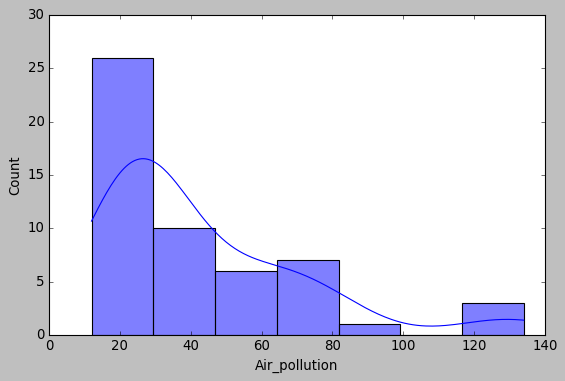

In [119]:
#data visualization for air quality 
plt.figure(figsize=(8,5))
sn.histplot(data=df, x="Air_pollution", kde=True)
df['Air_pollution'].skew()

#### 3.3 Detecting outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fedac5047f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fedac504fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fedac504d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fedac523250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fedac523c40>],
 'means': []}

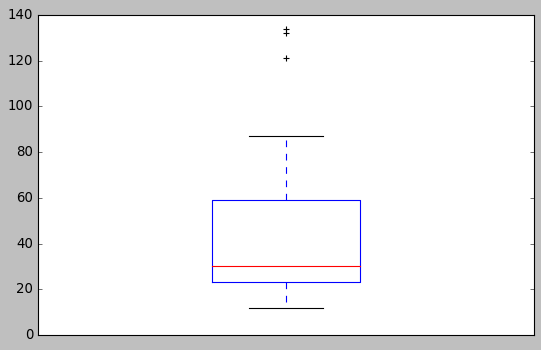

In [70]:
#boxplot for outliers 

# If there are errors importing the data, you can also copy the data in as a list.
# e.g. data = [1.95878982, 2.59203983, 1.22704688, ...]

# This line creates the figure. 
plt.figure(figsize=(8,5))

# Uncomment the next three lines to set the axis limits (otherwise they will be set automatically):
#axis_min = 0.95
#axis_max = 4.05
#plt.ylim([axis_min,axis_max])

# The next lines create and save the plot:
plt.xlim([0.75,1.25])

plt.xticks([])
plt.boxplot(df['Air_pollution'], manage_ticks=(False))

In [71]:
#dealling with outliers 
def detect_outliers(sr):
    q1 = sr.quantile(0.25)
    q3 = sr.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = sr.loc[(sr < fence_low) | (sr > fence_high)]
    return outliers


In [72]:
detect_outliers(df['Air_pollution'])

city
Beijing                                   121.0000
Dhaka                                     134.0000
Mumbai                                    132.0000
Name: Air_pollution, dtype: float64

In [73]:
# put outliers in a list
outliers = []
for i in detect_outliers(df['Air_pollution']).index:
    outliers.append(i)


In [74]:
#delete outliers 
#df = df.drop(outliers)
df.shape #though there are outliers, it could be a feature to some cities, so we'll keep it 

(53, 3)

#### 3.4 Data transformation 

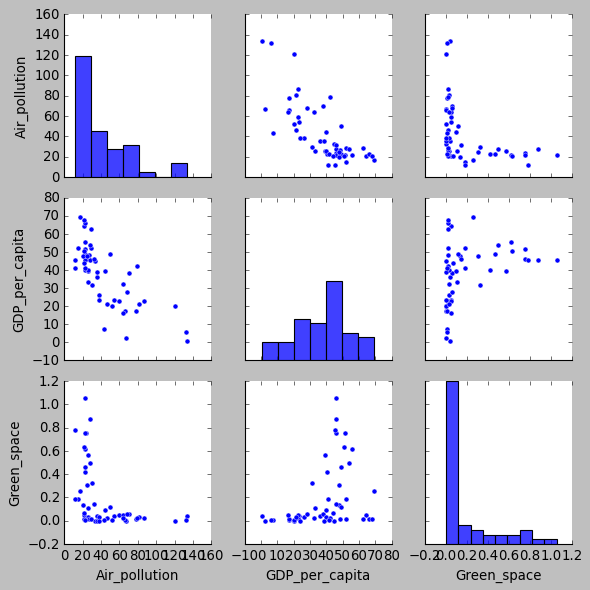

In [75]:
#check the relation and hist for each variables 
#To get a better result of regression, a normal distribution of air_quality is needed 
sn.pairplot(df)

In [76]:
# Potentially useful Scalers and Transformers
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
rbs = RobustScaler(quantile_range=[0.025,0.975])
mms = MinMaxScaler(feature_range=(0,1))
pts = PowerTransformer()
std = StandardScaler()

In [77]:
#conduct the Transformation 
#after several tests, here using a powertransformer to get the most Gaussian like distribution
df_norm =df.copy()
#for c in df_norm.columns.values:
#    df_norm[c] = pts.fit_transform(df_norm[c].values.reshape(-1,1))


In [78]:
#some other transformation 
#df_norm=df.apply(lambda x: boxcox1p(x,0.25)) #boxcox 
df_norm=df.copy()
df_norm['Air_pollution']=np.log(df.Air_pollution)#log = 0.44 4 
#df_norm=df.apply(lambda x: stats.boxcox(x)[0]) # boxcox 
#df_norm=np.sqrt(df) #


In [79]:
#data transform for x variable
#df_norm['Green_space']=np.sqrt(df['Green_space'])
#sn.histplot(data=df_norm, x="Green_space", kde=True)
#df_norm.Green_space.skew()

In [80]:
#sn.histplot(data=df, x="Green_space", kde=True)
#df.Green_space.skew()

0.44681486554259764

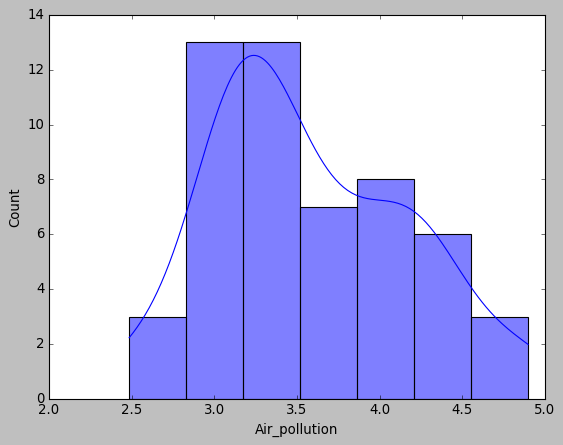

In [81]:
#data visualization y variable 
sn.histplot(data=df_norm, x="Air_pollution", kde=True)
df_norm.Air_pollution.skew()

In [82]:
# The data after transformation
df_norm.describe()

,Air_pollution,GDP_per_capita,Green_space
count,53.0000,53.0000,53.0000
mean,3.5804,37.6411,0.1883
std,0.5939,16.7553,0.2739
min,2.4849,0.5000,0.0000
25%,3.1355,23.4000,0.0171
50%,3.4012,40.3000,0.0444
75%,4.0775,48.1000,0.2581
max,4.8978,69.3000,1.0526


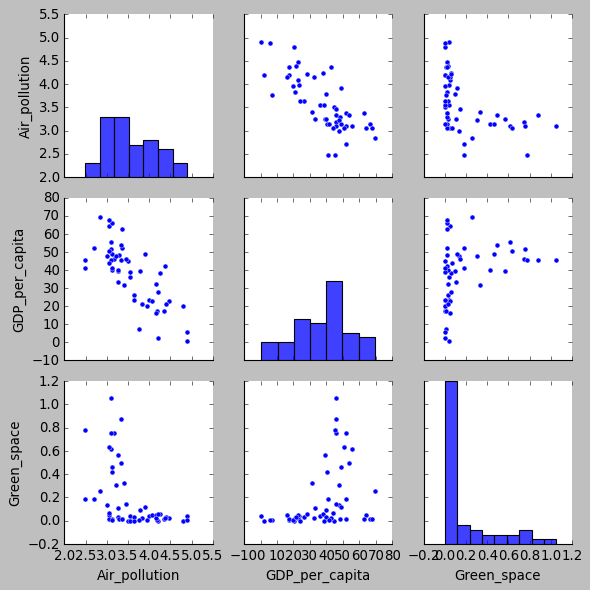

In [83]:
#check the relation and hist for each variables after norm
#To get a better result of regression, normalization is needed 
sn.pairplot(df_norm)

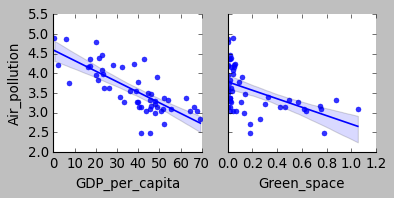

In [84]:
a = sn.pairplot(df_norm,x_vars=['GDP_per_capita','Green_space'] ,y_vars='Air_pollution',kind='reg')


<AxesSubplot:>

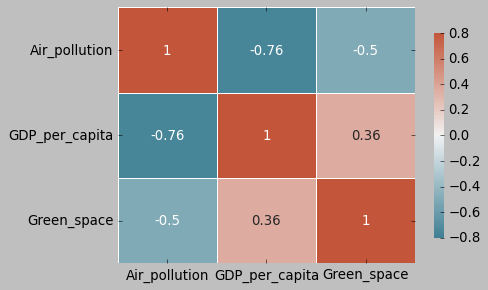

In [85]:
#Having a look at correlations between variables 
f = plt.figure(figsize=(6, 4))
corr=df_norm.corr()

a=sn.heatmap(corr,cmap=sn.diverging_palette(220, 20, as_cmap=True),
             vmin= -0.8, vmax=.8, center=0, linewidths=.5,annot=True,
             cbar_kws={"shrink": .8})
a


## 4. OLS Regression

#### 4.1 VIF

In [86]:
#VIF 
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [87]:
# using VIF on the bike_rental dataset

df_predictors_selected_VIF = drop_column_using_vif_(df_norm.drop('Air_pollution', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['GDP_per_capita', 'Green_space'], dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 4.2. Regression

In [88]:

import statsmodels.api as sms
# If there are errors importing the data, you can also copy it in as follows:
# e.g. data = [[737.4776314, 34, 65],
#              [869.2063792, 57, 73],
#              [1033.705248, 59, 100],
#              ...
#              [737.5129466, 66, 49]]
# (Compare this example with the file demo_multreg_data_example.csv)

# These lines extract the y-values and the x-values from the data:
y_values = df_norm['Air_pollution']
x_values = df_predictors_selected_VIF

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
predictor_coeffs  = regression_model_b.params[1:]
constant          = regression_model_b.params[0] # called the 'intercept' in simple regression
Rsquared          = regression_model_b.rsquared
MSE               = regression_model_b.mse_resid
pvalues_T         = regression_model_b.pvalues[1:]
pvalue_F          = regression_model_b.f_pvalue

# Note that predictor_coeffs is a list of the best-fit coefficients for x1, x2, x3, ...
# Similarly, pvalues_T is a list of the p-values associated with each of these variables in turn.

# Print these summary stats:
print("predictor coefficients =", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =", pvalues_T)
print("F-test pvalue          =", pvalue_F)

                            OLS Regression Results                            
Dep. Variable:          Air_pollution   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     42.83
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.45e-11
Time:                        13:11:47   Log-Likelihood:                -20.635
No. Observations:                  53   AIC:                             47.27
Df Residuals:                      50   BIC:                             53.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5727      0.125     36.

In [89]:
#regression
data_regression = sm.OLS(endog=df_norm['Air_pollution'], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
data_regression.summary()


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Air_pollution   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     42.83
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.45e-11
Time:                        13:11:47   Log-Likelihood:                -20.635
No. Observations:                  53   AIC:                             47.27
Df Residuals:                      50   BIC:                             53.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5727      0.125     36.476      0.000       4.321       4.824
GDP_per_capita    -0.0236      0.003     -7.227      0.000      -0.030      -0.017
Green_space       -0.5595      0.199     -2.805      0.007      -0.960      -0.159
==============================================================================
Omnibus:                        0.877   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.412
Skew:                          -0.201   Prob(JB):                        0.814
Kurtosis:                       3.159   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4.3 Residuals

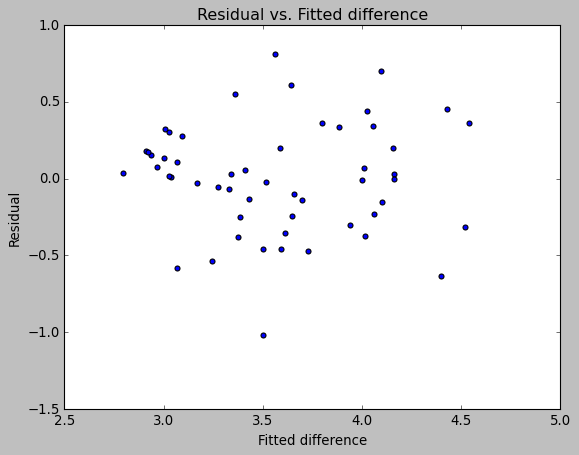

In [90]:
#residual 
# plot 
plt.scatter(data_regression.fittedvalues, data_regression.resid)
# adding title and labels
plt.xlabel('Fitted difference')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted difference')
plt.show()

## 5. Clustering

#### 5.1 Standardization 

array([[<AxesSubplot:title={'center':'GDP_per_capita'}>,
        <AxesSubplot:title={'center':'Green_space'}>]], dtype=object)

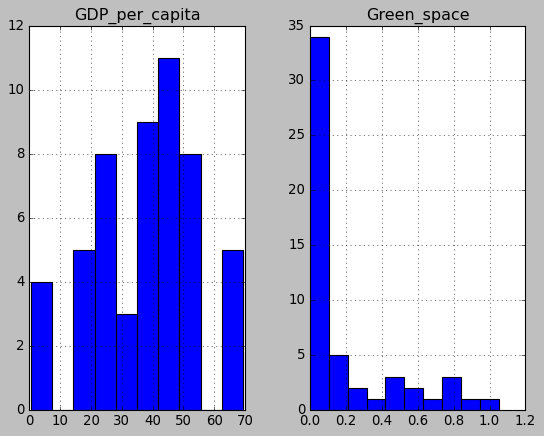

In [91]:
#check data distribution before clustering
cluster =df.drop(columns='Air_pollution', axis=1)
cluster.hist()


In [92]:
#Min_max rescaling for asymmetric data
cluster =df.drop(columns='Air_pollution', axis=1)
cluster_norm = cluster.copy()
for c in cluster_norm.columns.values:
    cluster_norm [c] = mms.fit_transform(cluster_norm [c].values.reshape(-1,1))

In [93]:
# Kmeans Cluster

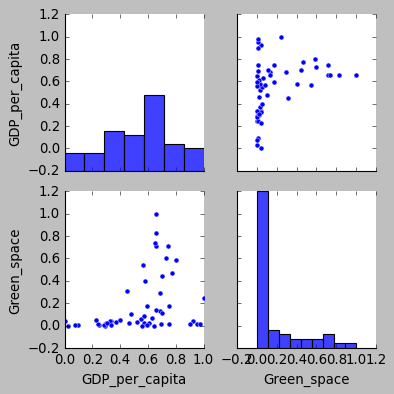

In [94]:
sns.pairplot(cluster_norm)

#### 5.2 Best number of clustering

In [95]:
X=cluster_norm.copy()

In [96]:
from sklearn import metrics
#silhoutte Score and elbow 
scores=[]#silhoutte Score
intra_sum_of_square_list = [] #elbow

max_cluster = 20
clusters = range(2,max_cluster)

for k in clusters:
    km = KMeans(n_clusters=k)
    labels=km.fit(X).labels_
    score=metrics.silhouette_score(X,labels)
    scores.append(score) #silhoutte Score
    intra_sum_of_square_list.append(km.inertia_) #elbow


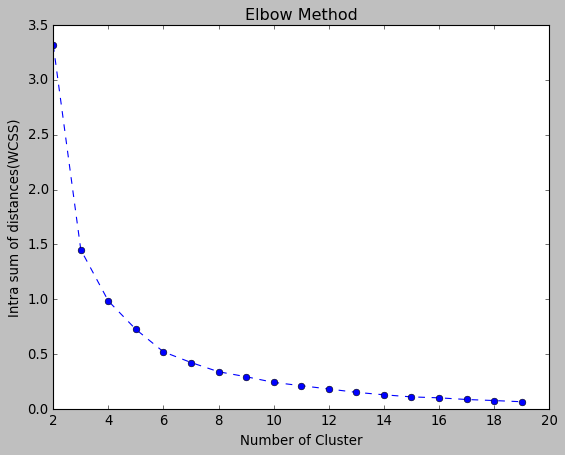

In [97]:
#Elbow
from matplotlib.pyplot import MultipleLocator
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Cluster")
ax.set_ylabel("Intra sum of distances(WCSS)")
plt.plot(clusters,intra_sum_of_square_list,marker = 'o', linestyle = '--')


x_major_locator = MultipleLocator(2)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

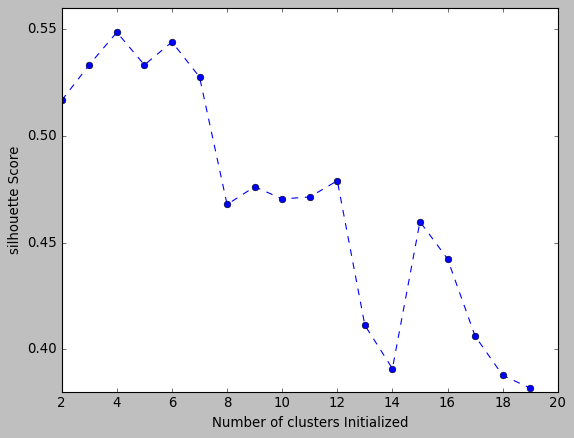

In [98]:

#silhoutte Score 
silhoutte_scores=[]#silhoutte Score
#intra_sum_of_square_list = [] #elbow
X2 = X

for k in clusters:
    km = KMeans(n_clusters=k)
    labels = km.fit(X2).labels_
    scoress = silhouette_score(X2,labels)
    silhoutte_scores.append(scoress) #silhoutte Score
    #intra_sum_of_square_list.append(km.inertia_) #elbow
    
plt.plot(clusters, silhoutte_scores, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters Initialized')
plt.ylabel('silhouette Score')

x_major_locator = MultipleLocator(2)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

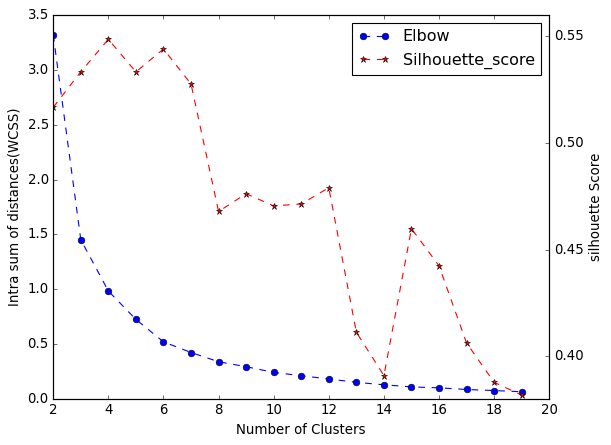

In [99]:
plt.rcParams['figure.facecolor'] ='white'


# combine two indicators together!
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

Elbow, =ax1.plot(clusters,intra_sum_of_square_list, label="Elbow", color= 'blue',marker = 'o', linestyle = '--')
Sihoutte_score, =ax2.plot(clusters, silhoutte_scores,label="Silhouette_score", color='red', marker = '*', linestyle = '--')

ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Intra sum of distances(WCSS)")
ax2.set_ylabel('silhouette Score')

x_major_locator = MultipleLocator(2)
ax1 = plt.gca()
ax1.xaxis.set_major_locator(x_major_locator)


#legend
legend = ax1.legend(handles=[Elbow,Sihoutte_score], loc='upper right')

#plt.savefig('data/img/bestK.png')

In [100]:
print(silhoutte_scores)

[0.5167405427063949, 0.533396857063753, 0.5486101066113781, 0.5333229010869643, 0.5440680123794526, 0.5276744750797165, 0.4679002474372396, 0.47622014994440004, 0.4705058894217176, 0.47142332033534606, 0.47901972198022214, 0.41129497728893916, 0.39096372660086753, 0.4598397723036006, 0.44241185775237674, 0.40622070928819937, 0.3878216070238172, 0.38182808182285]


In [101]:
print(intra_sum_of_square_list)

[3.3173387731062958, 1.45134299608466, 0.9841701573165574, 0.7253996847493959, 0.5209978508013282, 0.42379955632574995, 0.3394871798565257, 0.2941539914271711, 0.24253582747611294, 0.21247998280515085, 0.18231598405079516, 0.15196535029351843, 0.1295028653010886, 0.11034582749405993, 0.10187564680954848, 0.0866557272092233, 0.0770415859114318, 0.06612185404716371]


#### 5.3 KMeans clustering

In [102]:
# Kmeans 
km = KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300)
##Init is a sheet argument,max_iter is the max times to update the sheet
km.fit(X)
cluster_labels = km.predict(X)

In [103]:
#back to data
df['cluster_labels']=cluster_labels
df['cluster_labels']=cluster_labels
cluster_norm['cluster_labels']=cluster_labels

In [104]:
cluster_norm.head(2)

,GDP_per_capita,Green_space,cluster_labels
city,,,
London,0.7485,0.0162,1
Amsterdam,0.6613,0.7125,0


In [105]:
#calculate numbers in each cluster 
df.cluster_labels.value_counts()

1    22
2    20
0    11
Name: cluster_labels, dtype: int64

In [106]:
#if you want to do the cluster again
#df.drop(columns="cluster_labels",inplace=True)
#cluster_norm.drop(columns="cluster_labels",inplace=True)

#### 5.4 Cluster Result Visualization

<AxesSubplot:xlabel='GDP_per_capita', ylabel='Green_space'>

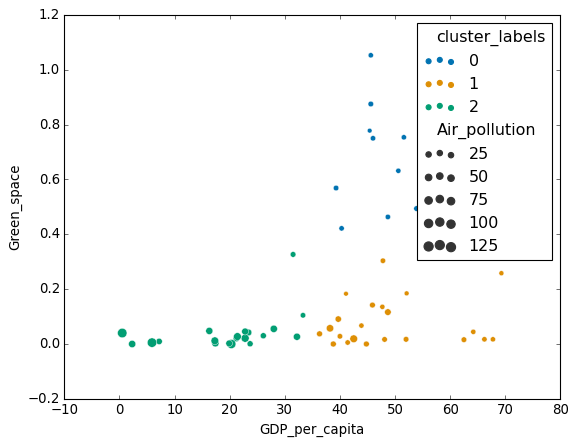

In [107]:
#distribution 
sns.scatterplot(data=df, x="GDP_per_capita", y="Green_space", hue="cluster_labels",palette="colorblind",size="Air_pollution")

/tmp/ipykernel_1405/455241298.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


Text(0.5, 0.98, 'Clusters Result')

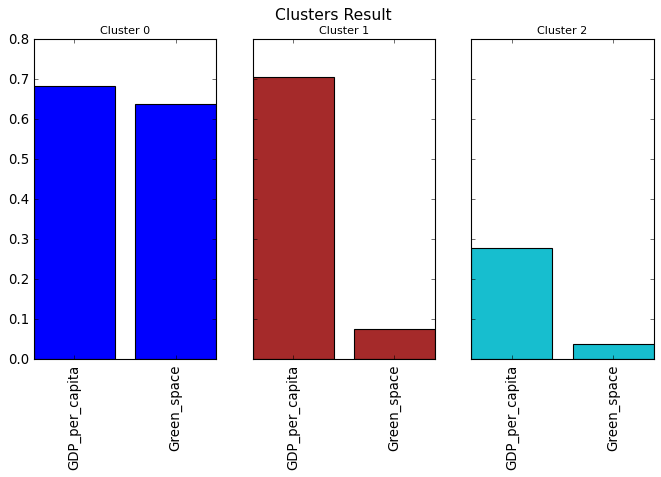

In [108]:
# Visualization of variables in each cluster 
agglom_means =cluster_norm.groupby("cluster_labels").mean()
agglom_means_T = agglom_means.T.round(4)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T.reset_index(inplace=True)

colors = ["blue", "brown", "tab:cyan","yellow",'red','black','green','pink']
fig, ax = plt.subplots(1,3, figsize = (10,5), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 10)
        
plt.suptitle("Clusters Result", fontsize = 14)

In [109]:
#combine the cluster result and the air_quality together
#calculate the mean of airquality for each cluster 
r=df.groupby("cluster_labels")['Air_pollution'].agg(Air_Quality='mean')
mean=r.T.reset_index()
#combine the air quality with the cluster result 
result=pd.concat([mean, agglom_means_T])

In [110]:
#the cluster result table 
result.set_index('index')

cluster_labels,0,1,2
index,,,
Air_Quality,22.8182,31.2273,67.4000
GDP_per_capita,0.6831,0.7056,0.2787
Green_space,0.6395,0.0759,0.0389


In [111]:
print(cluster_norm[cluster_norm['cluster_labels']==0].index)
print(cluster_norm[cluster_norm['cluster_labels']==1].index)
print(cluster_norm[cluster_norm['cluster_labels']==2].index)

Index(['Amsterdam', 'Brussels', 'Cologne', 'Copenhagen', 'Frankfurt', 'Geneva',
       'Hamburg', 'Oslo', 'Stockholm', 'Sydney', 'Zurich'],
      dtype='object', name='city')
Index(['London', 'Barcelona', 'Boston', 'Dublin', 'Guangzhou', 'Helsinki',
       'Hong Kong', 'Houston', 'Los Angeles', 'Madrid', 'Milan', 'Moscow',
       'New York City', 'Prague', 'Rome', 'Singapore', 'Taipei', 'Tokyo',
       'Toronto', 'Vancouver', 'Vienna', 'Warsaw'],
      dtype='object', name='city')
Index(['Ankara', 'Bangkok', 'Beijing', 'Berlin', 'Buenos Aires', 'Dhaka',
       'Dubai', 'Ho Chi Minh City', 'Istanbul', 'Jakarta', 'Johannesburg',
       'Lima', 'Lisbon', 'Mexico City', 'Mumbai', 'Rio de Janeiro',
       'Sao Paulo', 'Seoul', 'Shanghai', 'Shenzhen'],
      dtype='object', name='city')


#### Alternative: Hierarchical Clustering

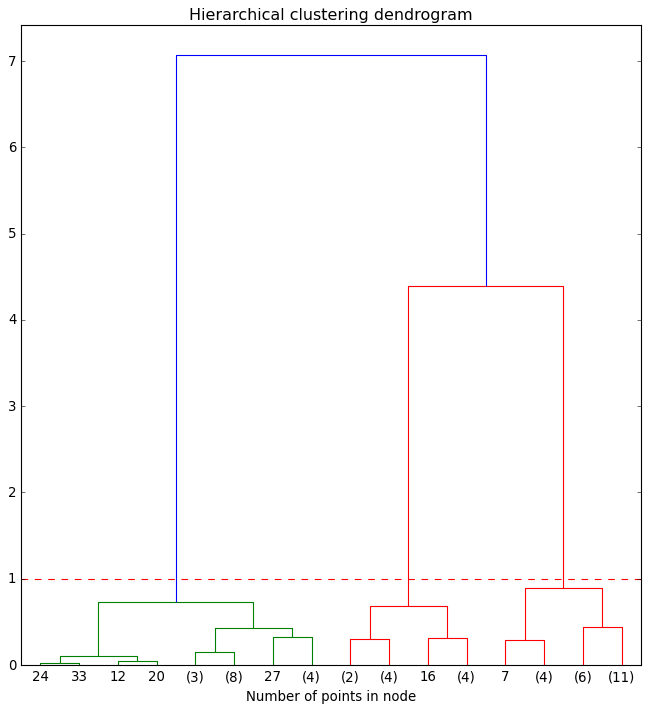

In [112]:
# Checking how many clusters can be divided - with a distance threshold = 1
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward", distance_threshold = 1, n_clusters=None)
model.fit(cluster_norm)

import numpy as np
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 1, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()
#plt.savefig('cluster_map.png', dpi = 600)

In [113]:
# check the result of clustering with a linkage method =ward
model15 = AgglomerativeClustering(linkage="ward", distance_threshold = 1, n_clusters=None)
model15.fit(cluster_norm)

AgglomerativeClustering(distance_threshold=1, n_clusters=None)

In [114]:
df_predictors_selected_VIF["Hcluster"] = model15.labels_
df["Hcluster"] = model15.labels_
cluster_norm["Hcluster"] = model15.labels_

In [115]:
#calculate numbers in each cluster 
#it shows the similar result of KMeans 
df.Hcluster.value_counts()

0    22
1    20
2    11
Name: Hcluster, dtype: int64

In [116]:
print(cluster_norm[cluster_norm['Hcluster']==0].index)
print(cluster_norm[cluster_norm['Hcluster']==1].index)
print(cluster_norm[cluster_norm['Hcluster']==2].index)

Index(['London', 'Barcelona', 'Boston', 'Dublin', 'Guangzhou', 'Helsinki',
       'Hong Kong', 'Houston', 'Los Angeles', 'Madrid', 'Milan', 'Moscow',
       'New York City', 'Prague', 'Rome', 'Singapore', 'Taipei', 'Tokyo',
       'Toronto', 'Vancouver', 'Vienna', 'Warsaw'],
      dtype='object', name='city')
Index(['Ankara', 'Bangkok', 'Beijing', 'Berlin', 'Buenos Aires', 'Dhaka',
       'Dubai', 'Ho Chi Minh City', 'Istanbul', 'Jakarta', 'Johannesburg',
       'Lima', 'Lisbon', 'Mexico City', 'Mumbai', 'Rio de Janeiro',
       'Sao Paulo', 'Seoul', 'Shanghai', 'Shenzhen'],
      dtype='object', name='city')
Index(['Amsterdam', 'Brussels', 'Cologne', 'Copenhagen', 'Frankfurt', 'Geneva',
       'Hamburg', 'Oslo', 'Stockholm', 'Sydney', 'Zurich'],
      dtype='object', name='city')
